- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited

_________________________________________________________________

# AIML Module Project - Unsupervised Learning - Project 1
_________________________________________________________________

### Assessment[ Total Score: 30 points ]

Please refer to the problem statement for questions and descriptions

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### Pre-requisites 

In [1]:
# Import libraries

# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


In [2]:
# Setting up options 

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#### Import and warehouse data: [ Score: 5 points ]


- Import all the given datasets and explore shape and size.  [ Score: 1 points ]
- Merge all datasets onto one and explore final shape and size. [ Score: 2 points ]
- Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use. [ Score: 1 points ]
- Import the data from above steps into python. [ Score: 1 points ]


In [3]:
# Import all the given datasets and explore shape and size.

import pandas as pd
Data1=pd.read_json (r'Car-Attributes.json')
Data2=pd.read_csv ('Car name.csv')

In [4]:
Data1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0000000,8,307.0000000,130,3504,12.0000000,70,1
1,15.0000000,8,350.0000000,165,3693,11.5000000,70,1
2,18.0000000,8,318.0000000,150,3436,11.0000000,70,1
3,16.0000000,8,304.0000000,150,3433,12.0000000,70,1
4,17.0000000,8,302.0000000,140,3449,10.5000000,70,1


In [5]:
Data2.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [6]:
# Merge all datasets onto one and explore final shape and size.

df=[Data1, Data2]

Data_Final = pd.concat(df,axis=1)
Data_Final.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0000000,8,307.0000000,130,3504,12.0000000,70,1,chevrolet chevelle malibu
1,15.0000000,8,350.0000000,165,3693,11.5000000,70,1,buick skylark 320
2,18.0000000,8,318.0000000,150,3436,11.0000000,70,1,plymouth satellite
3,16.0000000,8,304.0000000,150,3433,12.0000000,70,1,amc rebel sst
4,17.0000000,8,302.0000000,140,3449,10.5000000,70,1,ford torino


In [7]:
# Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

Data_Final.to_excel("Final_Data_Car.xlsx") # excel
Data_Final.to_csv("Final_Data_Car.csv")  # csv
Data_Final.to_json("Final_Data_Car.json") # json

In [8]:
# Import the data from above steps into python.

df=pd.read_json("Final_Data_Car.json") # can use excel or csv file too
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0000000,8,307.0000000,130,3504,12.0000000,70,1,chevrolet chevelle malibu
1,15.0000000,8,350.0000000,165,3693,11.5000000,70,1,buick skylark 320
2,18.0000000,8,318.0000000,150,3436,11.0000000,70,1,plymouth satellite
3,16.0000000,8,304.0000000,150,3433,12.0000000,70,1,amc rebel sst
4,17.0000000,8,302.0000000,140,3449,10.5000000,70,1,ford torino


#### 2. Data cleansing: [ Score: 5 points ]

- Missing/incorrect value treatment [ Score: 2 points ]
- Drop attribute/s if required using relevant functional knowledge 
- Perform another kind of corrections/treatment on the data. [ Score: 3 points ]

In [48]:
# Missing/incorrect value treatment

print("Missing values:",df.info())  # understand datatypes and values

print("Missing values:",df.isna().sum()) # check for null values if any

# Print all unique values from categorical variables
print("\n\nChecking for uniques values for dataset", df.nunique())
print("\n\nChecking for uniques values for columns",df['hp'].unique() )
print("\n\nChecking for uniques values for columns",df['car_name'].unique() )


print("\n\nUnwanted value in the column:",df['hp'].unique())  # "?" is the unwanted value

# Impute value
print("\n\nActual:",(df == '?').sum())
df.replace(['?'], df['hp'].mode()[0],inplace = True)  # Try mean, median or mode
print("\n\n->> Cleansing performed")
print("\nnCleansed:",(df == '?').sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       380 non-null    float64
 1   cyl       380 non-null    int64  
 2   disp      380 non-null    float64
 3   hp        380 non-null    int64  
 4   wt        380 non-null    int64  
 5   acc       380 non-null    float64
 6   yr        380 non-null    int64  
 7   origin    380 non-null    int64  
 8   car_name  380 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 39.7+ KB
Missing values: None
Missing values: mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64


Checking for uniques values for dataset mpg         126
cyl           5
disp         77
hp           88
wt          336
acc          85
yr           13
origin        3
car_name    294
dtype: int64


Checking for uniques values

Drop attribute/s if required using relevant functional knowledge

- No attributes needs to be dropped

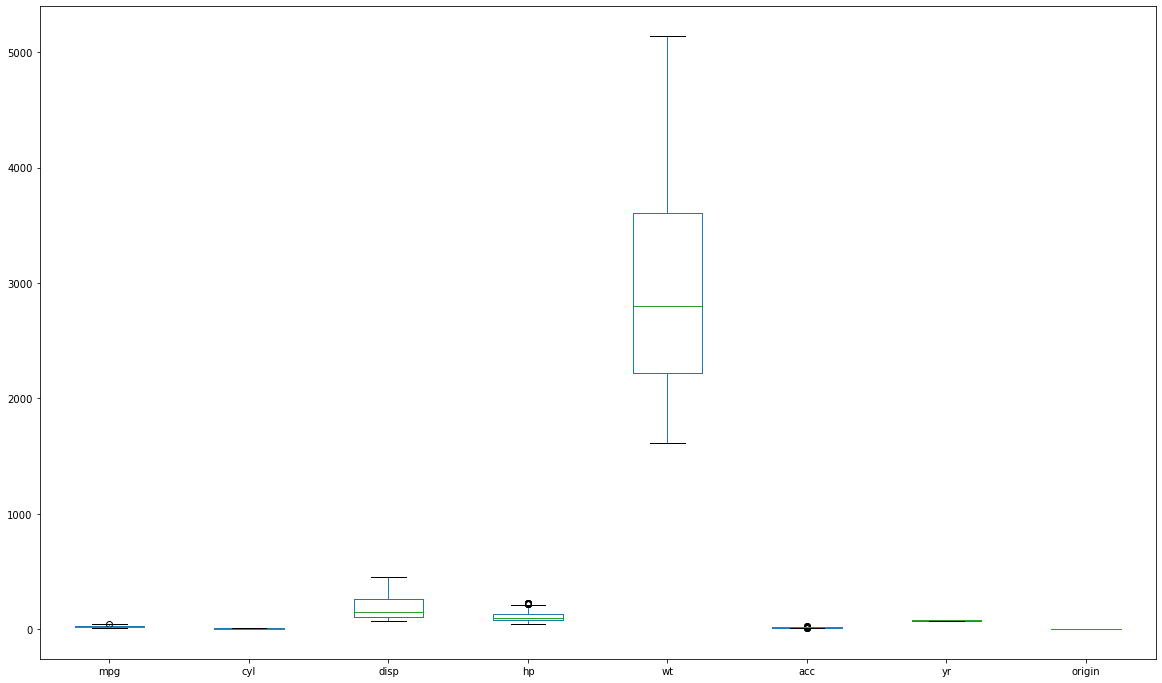

In [10]:
#Perform another kind of corrections/treatment on the data.

df.plot(kind='box' , figsize = (20,12) )

In [11]:
def remove_outlier(dFrame, col_name):
    q1 = dFrame[col_name].quantile(0.25)
    q3 = dFrame[col_name].quantile(0.75)
    IQR = q3-q1 #Interquartile range
    lowVal  = q1 - 1.5*IQR
    highVal = q3 + 1.5*IQR
    frame_ret = dFrame.loc[(dFrame[col_name] > lowVal) & (dFrame[col_name] < highVal)]
    return frame_ret

In [12]:
for col in df.columns:
    if(col != 'car_name'):
        df = remove_outlier(df, col)
        
print("Shape:",df.shape)

Shape: (380, 9)


#### 3. Data analysis & visualisation: [ Score: 5 points ]

- Perform detailed statistical analysis on the data. [ Score: 2 points ]
- Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. [ Score: 3 points ]


##### Perform detailed statistical analysis on the data.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,380.0000000,23.5821053,7.5929384,9.0000000,17.6000000,23.0000000,29.0000000,44.6000000
cyl,380.0000000,5.4078947,1.6737744,3.0000000,4.0000000,4.0000000,6.0000000,8.0000000
disp,380.0000000,189.0539474,99.0032001,68.0000000,105.0000000,146.0000000,258.0000000,429.0000000
hp,380.0000000,103.2631579,34.6613349,46.0000000,76.0000000,95.0000000,125.0000000,210.0000000
wt,380.0000000,2948.3578947,831.2896827,1613.0000000,2222.2500000,2789.5000000,3542.0000000,5140.0000000
acc,380.0000000,15.5673684,2.4332001,9.5000000,14.0000000,15.5000000,17.0000000,21.9000000
yr,380.0000000,76.1026316,3.6477475,70.0000000,73.0000000,76.0000000,79.0000000,82.0000000
origin,380.0000000,1.5842105,0.8094189,1.0000000,1.0000000,1.0000000,2.0000000,3.0000000


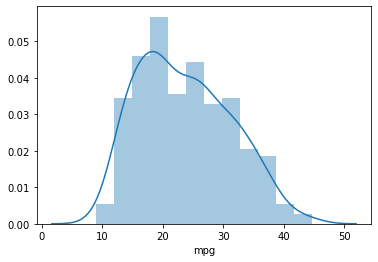

In [14]:
# univariate analysis by plotting histograms, countplot, distplot,etc as required.

sns.distplot(df['mpg'])  # Try using all the numeric variables

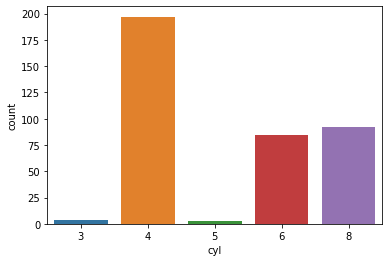

In [15]:
sns.countplot(df['cyl']) # Try using all the numeric variables

#### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 



In [16]:
# correlation in the data. Plot heatmap to visualize correlation between different variables.
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.0000000,-0.7751692,-0.8089909,-0.7614401,-0.8372421,0.3692087,0.5552236,0.5570693
cyl,-0.7751692,1.0000000,0.9553119,0.8247404,0.8957654,-0.4811335,-0.3145687,-0.5561305
disp,-0.8089909,0.9553119,1.0000000,0.8567491,0.9391172,-0.4956386,-0.3222737,-0.6156814
hp,-0.7614401,0.8247404,0.8567491,1.0000000,0.8520806,-0.6185766,-0.3436467,-0.4596443
wt,-0.8372421,0.8957654,0.9391172,0.8520806,1.0000000,-0.3837038,-0.2733762,-0.5806706
acc,0.3692087,-0.4811335,-0.4956386,-0.6185766,-0.3837038,1.0000000,0.2268423,0.1901636
yr,0.5552236,-0.3145687,-0.3222737,-0.3436467,-0.2733762,0.2268423,1.0000000,0.1565799
origin,0.5570693,-0.5561305,-0.6156814,-0.4596443,-0.5806706,0.1901636,0.1565799,1.0000000


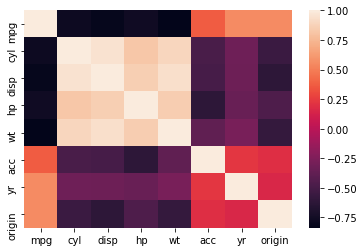

In [17]:
sns.heatmap(df.corr())

- We can see high correlation between a few variables like -
     - Cyl and mpg
     - disp and mpg
     - hp and mpg
     - wt and mpg
     - Cyl and disp
     - Cyl and hp
     - cyl and wt
     - Disp and hp
     - Disp and wt
     
- Acc, yr, and origin have less correlation with target and other independent features    

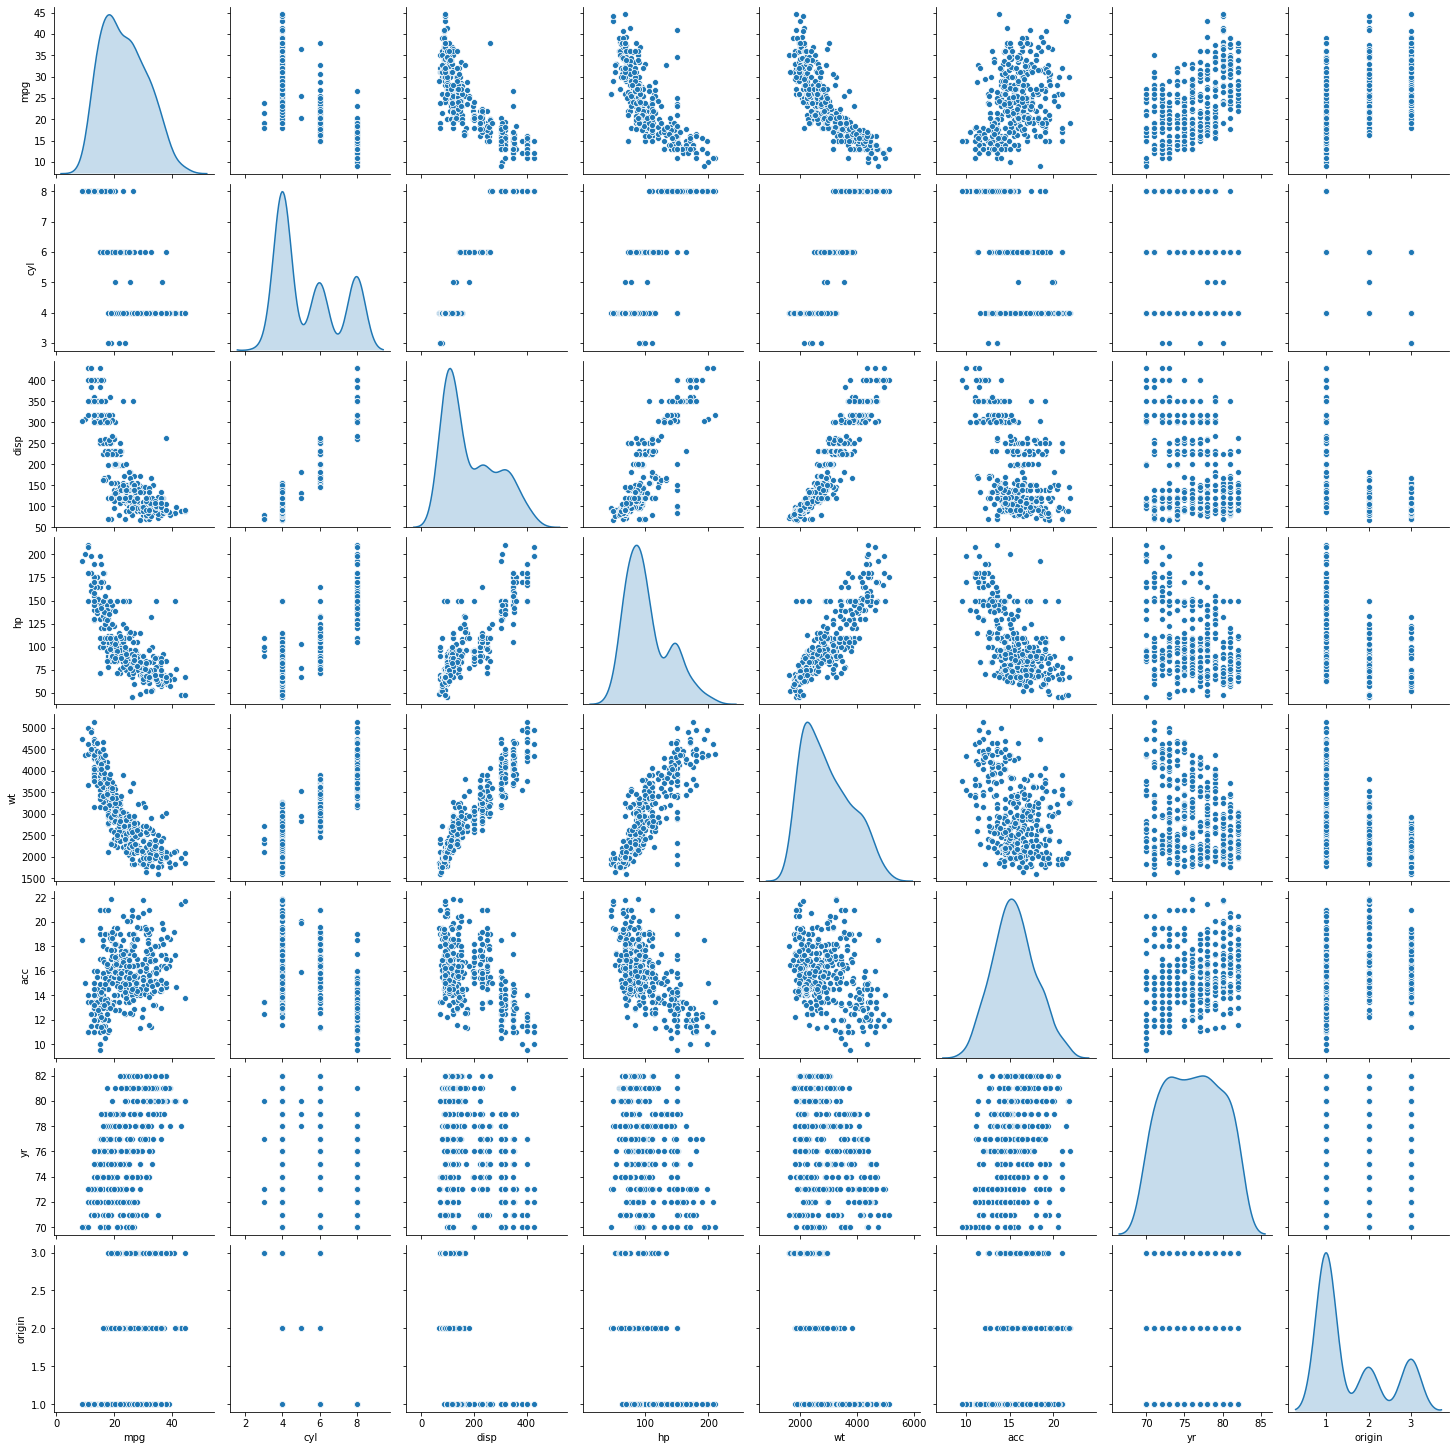

In [18]:
# pairplot for bivariate analysis. Write about distribution of independent and dependent variables.

sns.pairplot(df,diag_kind ='kde')

- Pairplot confirms the linear relationship betwen above mentioned features
- Origin and Cyl have three peaks
- A few features are right-skewed
- Acc and mpg are normally distributed

#### 4. Machine learning: [ Score: 8 points ]

- Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. [ Score: 5 points ]
- Share your insights about the difference in using these two methods. [ Score: 3 points ]

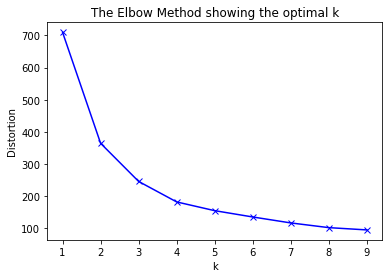

In [19]:
# Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data.

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# We are dropping car name. We could try label encoder or some text 
# preprocessing techniques to extract unique values
df_final = df.drop(['car_name'],axis=1) 

# We are making use of cdsit function to calculate errors.
# Kmeans.inertia_ can also be used here
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_final)
    kmeanModel.fit(df_final)
    distortions.append(
        sum(np.min(cdist(df_final, 
                   kmeanModel.cluster_centers_, 'euclidean'), 
                   axis=1)) / df_final.shape[0])

import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_final)
kmeans.labels_

array([1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [21]:
df_final['label'] = kmeans.labels_
df_final.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,label
0,18.0000000,8,307.0000000,130,3504,12.0000000,70,1,1
1,15.0000000,8,350.0000000,165,3693,11.5000000,70,1,2
2,18.0000000,8,318.0000000,150,3436,11.0000000,70,1,1
3,16.0000000,8,304.0000000,150,3433,12.0000000,70,1,1
4,17.0000000,8,302.0000000,140,3449,10.5000000,70,1,1


In [22]:
pd.crosstab(df_final['label'],df_final['cyl'])

cyl,3,4,5,6,8
label,,,,,
0,3,161,0,5,0
1,1,36,3,73,13
2,0,0,0,6,79


In [23]:
pd.crosstab(df_final['label'],df_final['origin'])

origin,1,2,3
label,,,
0,56,45,68
1,96,20,10
2,84,1,0


##### Hierarchial clustering

In [49]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

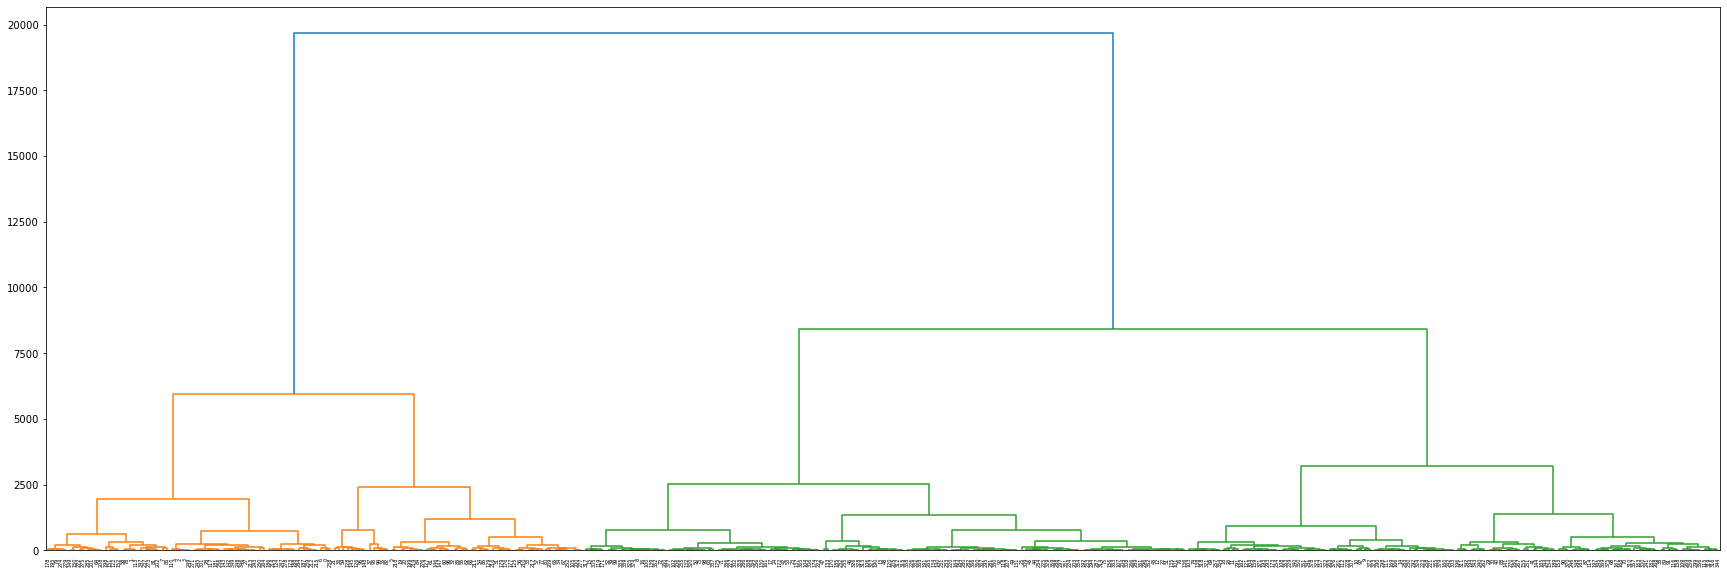

In [54]:
plt.figure(figsize=(30,10))
mergings = linkage(df_final, method = "ward", metric='euclidean')
dendrogram(mergings)
plt.show()

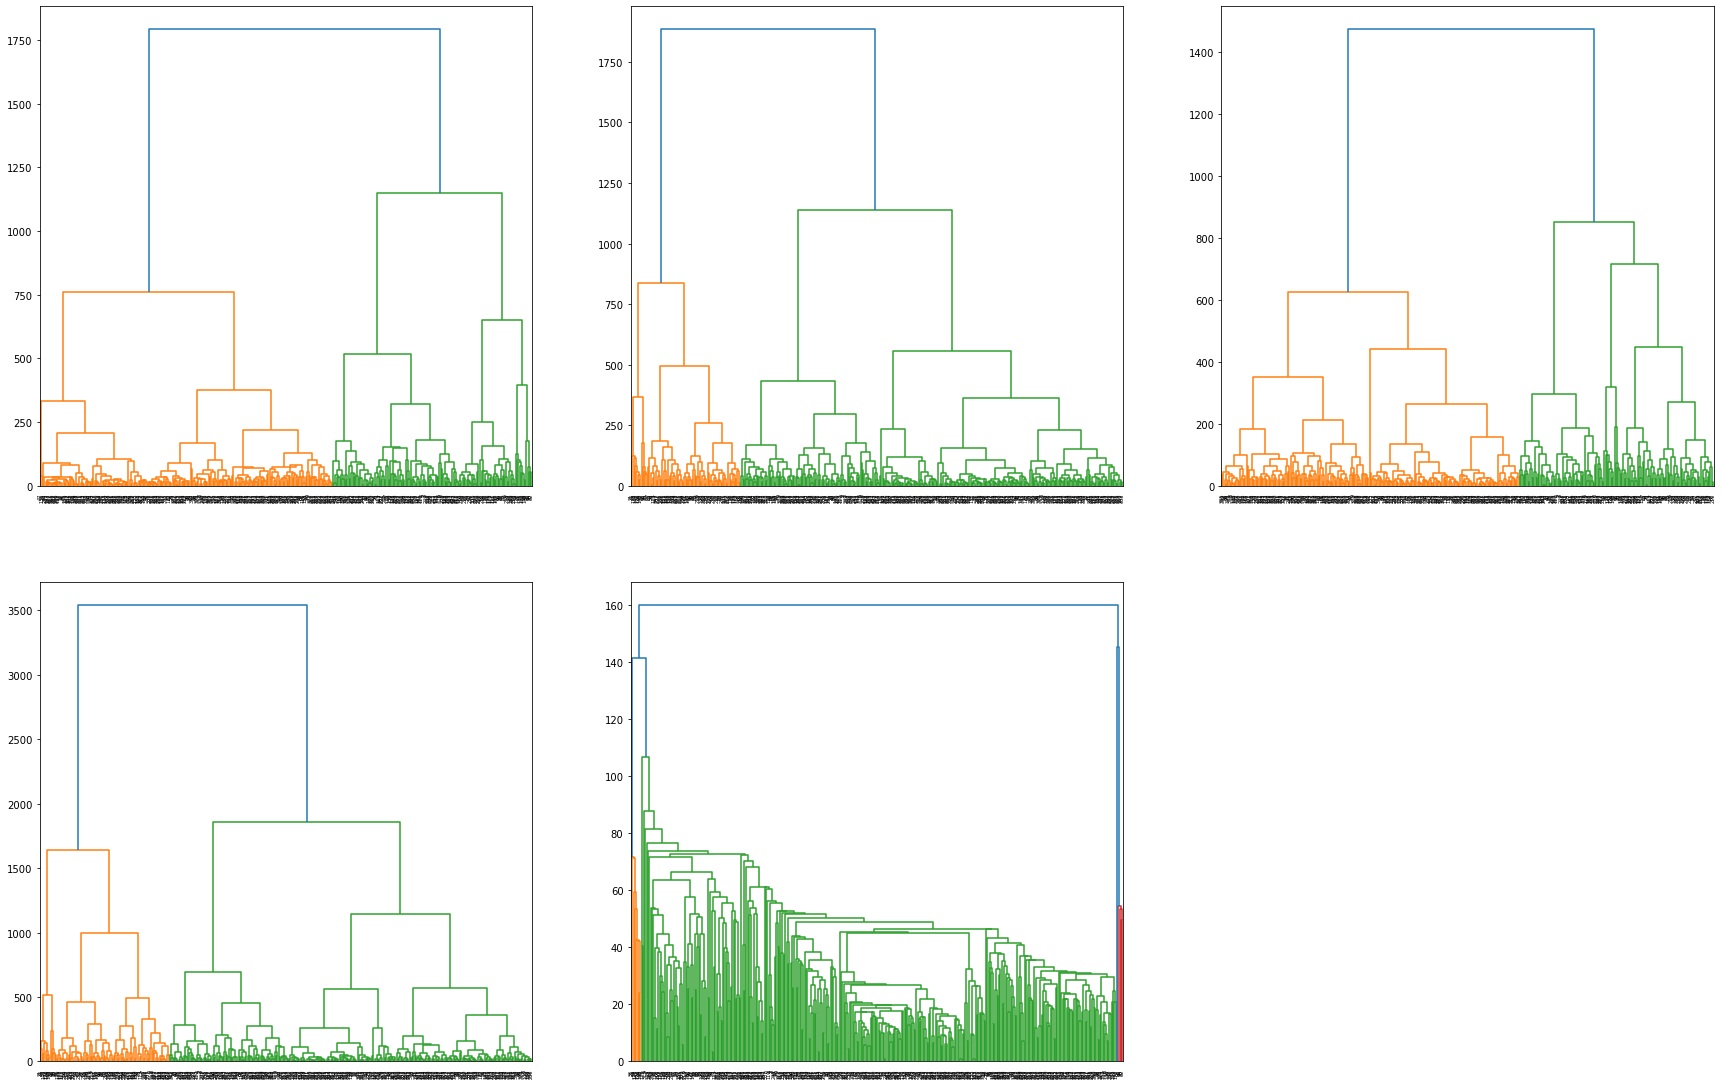

In [55]:
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
mergings = linkage(df_final, method = "median", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,2)
mergings = linkage(df_final, method = "weighted", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,3)
mergings = linkage(df_final, method = "average", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,4)
mergings = linkage(df_final, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,5)
mergings = linkage(df_final, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Insights: Compare k means vs heirarchial 

#### 5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]

- Mention how many optimal clusters are present in the data and what could be the possible reason behind it. [ Score: 1 points ]
- Use linear regression model on different clusters separately and print the coefficients of the models individually. [ Score: 3 points ]
- How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction. [ Score: 1 points ]

##### Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

 - We got somewhere around 3-4 optimal clusters
 - We can see that there are three types of origin in the data and hence it makes sense to conclude that there could be 3-4 types of clusters for these data

##### Use linear regression model on different clusters separately and print the coefficients of the models individually

In [24]:
from sklearn.model_selection import train_test_split
data_X = df_final.drop(['mpg', 'label'],axis=1)
data_y = df_final['mpg']
xtrain, xtest, ytrain, ytest = train_test_split(data_X,data_y,test_size = 0.3)
xtrain.head(2)

,cyl,disp,hp,wt,acc,yr,origin
374,4,151.0000000,150,3035,20.5000000,82,1
204,4,85.0000000,70,1990,17.0000000,76,3


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [26]:
print("Training accuracy:",model.score(xtrain,ytrain))
print("\n\nTestting accuracy",model.score(xtest,ytest))

Training accuracy: 0.8111483933621694


Testting accuracy 0.8501555514187339


In [27]:
# Let's build separate model for each cluster
data1 = df_final[df_final.loc[:,'label'] == 0]
data1.head(1)

,mpg,cyl,disp,hp,wt,acc,yr,origin,label
14,24.0000000,4,113.0000000,95,2372,15.0000000,70,3,0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data1_X = data1.drop(['mpg', 'label'],axis=1)
data1_y = data1['mpg']

In [29]:
data1_xtrain, data1_xtest, data1_ytrain, data1_ytest = train_test_split(data1_X,data1_y,test_size = 0.3)

In [30]:
data1_xtrain.shape

(118, 7)

In [31]:
Lreg = LinearRegression()

In [32]:
Lreg.fit(data1_xtrain,data1_ytrain)

LinearRegression()

In [33]:
data1_ypred = Lreg.predict(data1_xtest)

In [34]:
Lreg.score(data1_xtest, data1_ytest)

0.5785674587867573

In [35]:
Lreg.score(data1_xtrain, data1_ytrain)

0.73278707132838

In [36]:
data2 = df_final[df_final.loc[:,'label'] == 1]

In [37]:
data2_X = data2.drop(['mpg', 'label'],axis=1)
data2_y = data2['mpg']

In [38]:
data2_X.head(2)

,cyl,disp,hp,wt,acc,yr,origin
0,8,307.0000000,130,3504,12.0000000,70,1
2,8,318.0000000,150,3436,11.0000000,70,1


In [39]:
data2_xtrain, data2_xtest, data2_ytrain, data2_ytest = train_test_split(data2_X,data2_y,test_size = 0.3)
Lreg2 = LinearRegression()
Lreg2.fit(data2_xtrain,data2_ytrain)

LinearRegression()

In [40]:
Lreg2.score(data2_xtest, data2_ytest)

0.6420276694755829

In [41]:
Lreg2.score(data2_xtrain, data2_ytrain)

0.5732170536544849

In [42]:
a1 = Lreg2.coef_
a1

array([-0.61524106,  0.0119485 , -0.04276094, -0.00527303, -0.09637497,
        0.67739159,  0.87320428])

In [43]:
data3 = df_final[df_final.loc[:,'label'] == 2]

In [44]:
data3_X = data3.drop(['mpg', 'label'],axis=1)
data3_y = data3['mpg']

In [45]:
data3_xtrain, data3_xtest, data3_ytrain, data3_ytest = train_test_split(data3_X,data3_y,test_size = 0.3)
Lreg3 = LinearRegression()
Lreg3.fit(data3_xtrain,data3_ytrain)

LinearRegression()

In [46]:
Lreg3.score(data3_xtest, data3_ytest)

0.3986558885884912

In [47]:
Lreg3.score(data3_xtrain,data3_ytrain)

0.6334577467585787

##### How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

- We can see that the original model is performing much better than the individual models
- Here, since there is high correlation between target and independent features we do not need cluster information to build a good regression model.
- We can use clustering to understand how different types are cars are influnced by various independent features
- Dataset size is quite less for individual models

#### Improvisation: [ Score: 2 points ]

- x
- y

##### ---> Project should be submitted as a single “.html” and “.ipynb” file. Follow the below best practices where your submission should be:

- ”.html” and ".ipynb" files should be an exact match.
- Pre-run codes with all outputs intact.
- Error free & machine independent i.e. run on any machine without adding any extra code.
- Well commented for clarity on code designed, approach taken, insights found and results obtained.

                                        END


_________________________________________________________________

©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited
________________________________________________________